In [197]:
import pandas as pd

df = pd.read_csv('sample.csv')

In [198]:
df.head()

,Unnamed: 0,Sleep duration,Sleep efficiency,Age,REM sleep percentage,Light sleep percentage,Deep sleep percentage
0,0,7.0,0.73,61,20,13,65
1,1,8.0,0.81,21,24,17,60
2,2,6.0,0.72,41,18,10,70
3,3,9.0,0.56,12,18,45,35
4,4,7.0,0.94,27,28,21,57


In [199]:
import numpy as np

X = np.array(df['Sleep duration'].values)

In [200]:
X[:10]

array([7. , 8. , 6. , 9. , 7. , 7. , 8. , 8. , 8.5, 8. ])

In [201]:
X = np.sort(X, axis=None)

In [202]:
X[:10]

array([5. , 5. , 5.5, 6. , 6. , 6. , 6. , 6. , 6. , 6. ])

In [203]:
X_unique, n = np.unique(X, return_counts=True)

In [204]:
X_unique

array([ 5. ,  5.5,  6. ,  7. ,  7.5,  8. ,  8.5,  9. , 10. ])

In [205]:
n

array([ 2,  1, 11, 28, 19, 28, 11,  5,  1])

In [206]:
k = int(1 + 3.31 * np.log10(len(n)))
if k % 2 == 0:
    k += 1

In [207]:
k

5

In [208]:
h = (np.max(X_unique) - np.min(X_unique)) / k

In [209]:
h

1.0

In [210]:
intervals = []

min = X_unique[0]
for i in range(1,k):
    interval = []
    interval.append(min + (i - 1) * h)
    interval.append(min + i * h)
    intervals.append(interval)
interval = [min + (k - 1) * h, min + k * h]
intervals.append(interval)

In [211]:
intervals

[[5.0, 6.0], [6.0, 7.0], [7.0, 8.0], [8.0, 9.0], [9.0, 10.0]]

In [212]:
mid = np.array([(i[0] + i[1]) / 2 for i in intervals])

In [213]:
mid

array([5.5, 6.5, 7.5, 8.5, 9.5])

In [214]:
n_ = np.zeros(len(intervals))
for x in X:
    for i in range(len(intervals)):
        if x >= intervals[i][0] and (i < len(intervals) - 1 and x < intervals[i][1] or i == len(intervals) - 1 and x <= intervals[i][1]):
            n_[i] += 1

In [215]:
n_

array([ 3., 11., 47., 39.,  6.])

| $i$ | $[x_i, x_{i+1})$ | $\tilde{x}_i$ | $n_i$ | $p_{i}^{*}$ | $n_{i}^{\Sigma}$ | $p_{i}^{\Sigma}$ |
| --- | ---------------- | ------------- | ----- | ----------- | ---------------- | ---------------- |
| 1   | $[5, 6)$         | 5.5           | 3     | 0.028       | 3                | 0.028            |
| 2   | $[6, 7)$         | 6.5           | 11    | 0.104       | 14               | 0.132            |
| 3   | $[7, 8)$         | 7.5           | 47    | 0.443       | 61               | 0.575            |
| 4   | $[8, 9)$         | 8.5           | 39    | 0.368       | 100              | 0.943            |
| 5   | $[9, 10]$        | 9.5           | 6     | 0.057       | 106              | 1                |
|     |                  | $\Sigma$      | 106   | 1           |                  |                  |

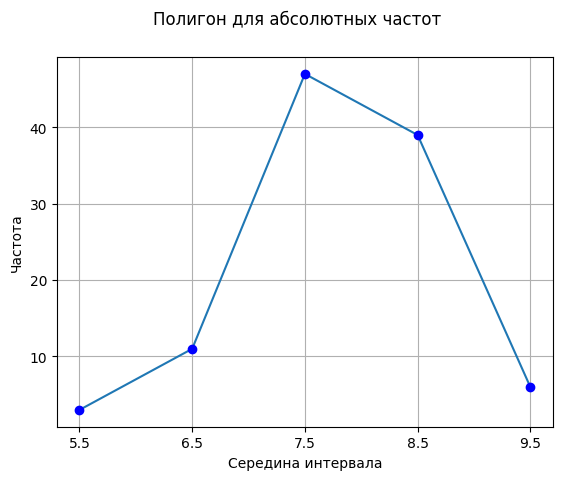

In [216]:
import matplotlib.pyplot as plt

plt.suptitle("Полигон для абсолютных частот")
plt.xlabel("Середина интервала")
plt.ylabel("Частота")
plt.grid()
plt.xticks(mid)
plt.plot(mid, n_)
plt.plot(mid, n_, 'bo')
plt.show()

In [217]:
bins = [i[0] for i in intervals]
bins.append(intervals[-1][1])

In [218]:
bins

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

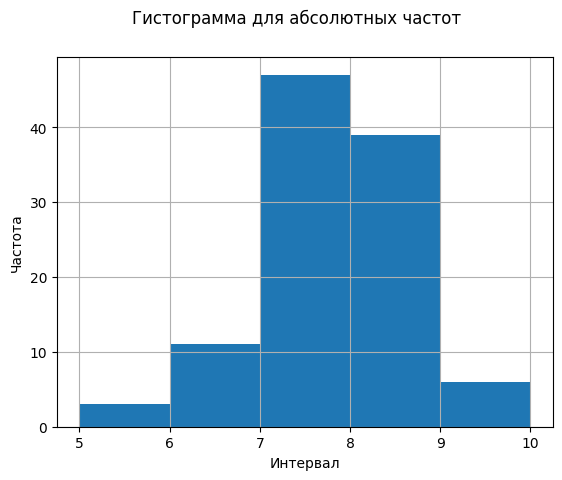

In [219]:
plt.suptitle("Гистограмма для абсолютных частот")
plt.xlabel("Интервал")
plt.ylabel("Частота")
plt.grid()
plt.hist(X, bins=bins)
plt.show()

In [220]:
m = [0, 0]
for i in n_:
    m.append(m[-1] + i)
    m.append(m[-2] + i)
m.append(m[-1])

In [221]:
m

[0, 0, 3.0, 3.0, 14.0, 14.0, 61.0, 61.0, 100.0, 100.0, 106.0, 106.0, 106.0]

In [222]:
x = [bins[0] - h]
for i in bins:
    x.append(i - 0.01)
    x.append(i)

In [223]:
x

[4.0, 4.99, 5.0, 5.99, 6.0, 6.99, 7.0, 7.99, 8.0, 8.99, 9.0, 9.99, 10.0]

In [224]:
m_ = [m[i] for i in range(0, len(m), 2)]
m_ = m_[1:-1]

In [225]:
m_

[3.0, 14.0, 61.0, 100.0, 106.0]

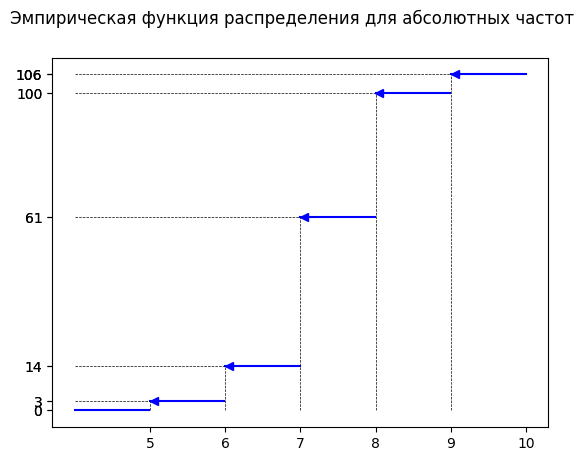

In [226]:
plt.suptitle("Эмпирическая функция распределения для абсолютных частот")
plt.xticks(bins)
plt.yticks(m)
for i in range(len(x) - 1):
    if i%2:
        continue
    plt.plot([x[i], x[i+1]], [m[i], m[i+1]], 'b')
for i, j in zip(bins[:-1], m_):
    plt.plot([i, i],[0, j], '--', color='black', linewidth=0.5)
    plt.plot([bins[0] - h, i],[j, j], '--', color='black', linewidth=0.5)
plt.plot(np.array(bins[:-1]) + 0.05, m_, 'b<')
plt.show()

In [227]:
p_ = n_ / len(X)

In [228]:
p_

array([0.02830189, 0.10377358, 0.44339623, 0.36792453, 0.05660377])

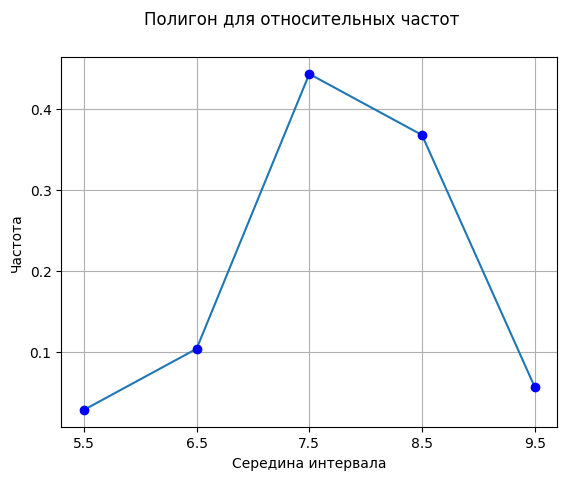

In [229]:
plt.suptitle("Полигон для относительных частот")
plt.xlabel("Середина интервала")
plt.ylabel("Частота")
plt.grid()
plt.xticks(mid)
plt.plot(mid, p_)
plt.plot(mid, p_, 'bo')
plt.show()

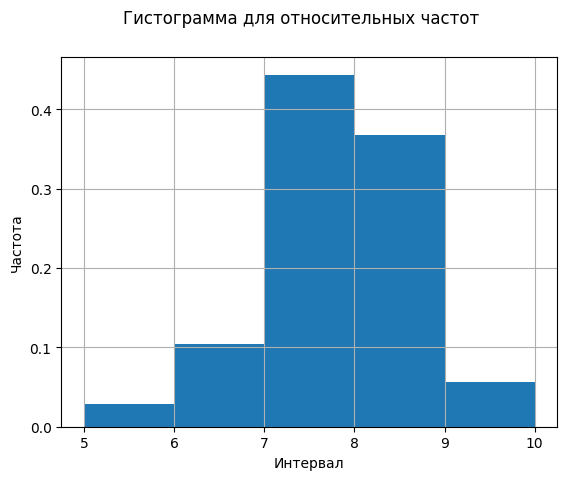

In [230]:
plt.suptitle("Гистограмма для относительных частот")
plt.xlabel("Интервал")
plt.ylabel("Частота")
plt.grid()
plt.hist(X, bins=bins, density=True)
plt.show()

In [231]:
m = np.array(m)
m = m / len(X)

In [232]:
m

array([0.        , 0.        , 0.02830189, 0.02830189, 0.13207547,
       0.13207547, 0.5754717 , 0.5754717 , 0.94339623, 0.94339623,
       1.        , 1.        , 1.        ])

In [233]:
m_ = np.array(m_) / len(X)

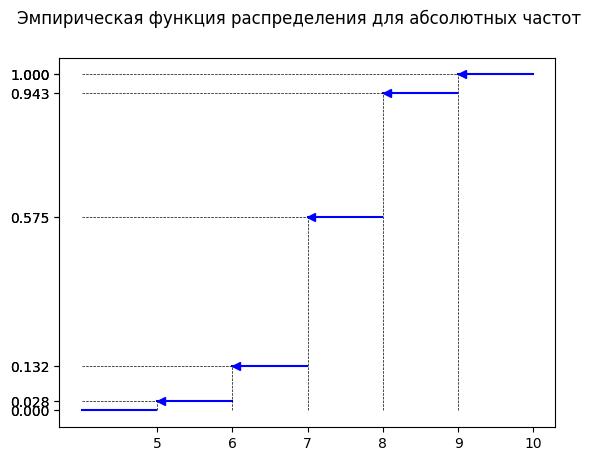

In [234]:
plt.suptitle("Эмпирическая функция распределения для абсолютных частот")
plt.xticks(bins)
plt.yticks(m)
for i in range(len(x) - 1):
    if i%2:
        continue
    plt.plot([x[i], x[i+1]], [m[i], m[i+1]], 'b')
for i, j in zip(bins[:-1], m_):
    plt.plot([i, i],[0, j], '--', color='black', linewidth=0.5)
    plt.plot([bins[0] - h, i],[j, j], '--', color='black', linewidth=0.5)
plt.plot(np.array(bins[:-1]) + 0.05, m_, 'b<')
plt.show()

In [290]:
C = mid[int(len(mid) / 2)]

In [291]:
C

7.5

In [237]:
# p_[3] += 0.00001
# p_ = [round(i, 5) for i in p_]

In [292]:
p_

array([0.02830189, 0.10377358, 0.44339623, 0.36792453, 0.05660377])

In [293]:
u = []
for x in mid:
    u.append((x - C) / h)

In [294]:
u

[-2.0, -1.0, 0.0, 1.0, 2.0]

In [295]:
nu = []
for i in range(1,5):
    temp = []
    for p, q in zip(p_, u):
        temp.append(p * (q ** i))
    nu.append(temp)

nu.append([])
for p, q in zip(p_, u):
    nu[-1].append(p * ((q + 1) ** 4))

In [296]:
print(nu)

[[-0.05660377358490566, -0.10377358490566038, 0.0, 0.36792452830188677, 0.11320754716981132], [0.11320754716981132, 0.10377358490566038, 0.0, 0.36792452830188677, 0.22641509433962265], [-0.22641509433962265, -0.10377358490566038, 0.0, 0.36792452830188677, 0.4528301886792453], [0.4528301886792453, 0.10377358490566038, 0.0, 0.36792452830188677, 0.9056603773584906], [0.02830188679245283, 0.0, 0.44339622641509435, 5.886792452830188, 4.584905660377359]]


In [298]:
s = []
for u in nu:
    sum = 0
    for i in u:
        sum+= i
    s.append(sum)

In [299]:
s

[0.320754716981132,
 0.8113207547169812,
 0.490566037735849,
 1.830188679245283,
 10.943396226415095]

In [264]:
print(s[-1], s[-2] + 4 * s[-3] + 6 * s[-4] + 4 * s[-5] + 1)

10.943396226415095 10.943396226415093


| $i$ | $x_i$ | $n_i$   | $u_i$ | $n_iu_i$ | $n_iu_i^2$ | $n_iu_i^3$ | $n_iu_i^4$ | $n_i(u_i + 1)^4$ |
| --- | ----- | ------- | ----- | -------- | ---------- | ---------- | ---------- | ---------------- |
| 1   | 5.5   | 0.0283  | -2    | -0.0566  | 0.1132     | -0.2264    | 0.4528     | 0.0283           |
| 2   | 6.5   | 0.10377 | -1    | -0.10377 | 0.10377    | -0.10377   | 0.10377    | 0                |
| 3   | 7.5   | 0.4434  | 0     | 0        | 0          | 0          | 0          | 0.4434           |
| 4   | 8.5   | 0.36793 | 1     | 0.36793  | 0.36793    | 0.36793    | 0.36792    | 5.88688          |
| 5   | 9.5   | 0.0566  | 2     | 0.1132   | 0.2264     | 0.4528     | 0.90566    | 4.5846           |
|  | $\Sigma$ | 1       | -     | 0.32076  | 0.8113     | 0.49056    | 1.8301     | 10.94318         |

Проведем контроль вычислений. Должно выполняться неравенство $$\Sigma n_j(u_j + 1)^4=\Sigma n_ju_j^4 + 4\Sigma n_ju_j^3 + 6\Sigma n_ju_j^2 + 4\Sigma n_ju_j + 1$$ $$1.8301 + 4 * 0.49056 + 6 * 0.8113 + 4 * 0.32076 + 1 = 10.94318$$


$$\overline{m}_k=\frac{1}{n}\Sigma n_j(x_j-\overline{x}_в)^k$$

In [300]:
mu = []
mu.append(0)
mu.append((s[1] - (s[0] ** 2)) * h ** 2)
mu.append((s[2] - 3 * s[1] * s[0] + 2 * (s[0] ** 3)) * h ** 3)
mu.append((s[3] - 4 * s[2] * s[0] + 6 * s[1] * (s[0] ** 2) - 3 * (s[0] ** 4)) * h ** 4)

In [301]:
mu

[0, 0.7084371662513351, -0.22413804684403904, 1.6698576423921432]

| $i$ | $\nu_i^{*}$ | $\mu_i^{*}$ |
| --- | ----------- | ----------- |
| 1   | 0.32076     | 0           |
| 2   | 0.8113      | 0.70844     |
| 3   | 0.49056     | -0.22413    |
| 4   | 1.8301      | 1.66986     |

In [286]:
sum = 0
for x, p in zip(mid, n_):
    sum += x * p
mean_1 = sum / len(X)

sum = 0
for x, p in zip(mid, n_):
    sum += ((x - mean_1) ** 2) * p
D_1 = sum / len(X)

print(mean_1, D_1)

sum = 0
for x, p in zip(mid, p_):
    sum += (x - C) / h * p
M_1 = sum
mean_2 = sum * h + C

sum = 0
for x, p in zip(mid, p_):
    sum += ((x - C) ** 2) / h * p
M_2 = sum

D_2 = (M_2 - (M_1 ** 2)) * h ** 2

print(mean_2, D_2)

7.820754716981132 0.7084371662513349
7.820754716981132 0.7084371662513351
